## Data Preparation
##### Using the Support Vector Machine (SVM) algorithm to solve the problem of basic waste sorting at home
In this classification article, I use data on 4 different types of waste: 'Hazardous waste', 'Organic waste', 'Other waste', and 'Recyclable waste'. You can get the data and code from my personal github.

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import os # quản lí hệ điều hành và tệp tin
from PIL import Image  # Thư viện xử lý ảnh ở nhiều định dạng khác nhau
import numpy as np  # Thư viện xử lý mảng nhiều chiều
from skimage.feature import local_binary_pattern, hog 
from skimage import exposure  # Xử lý ảnh ở
import cv2 as cv
import random as random

In [2]:
dataDir = 'DATA_clean'
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)


['Hazardous waste', 'Organic waste', 'Other waste', 'Recyclable waste']
[1011, 1031, 4424, 16874]


## Visualization data
Tập dữ liệu mà tôi sử dụng gồm 4 class, số lượng samples của mỗi class là khác nhau.

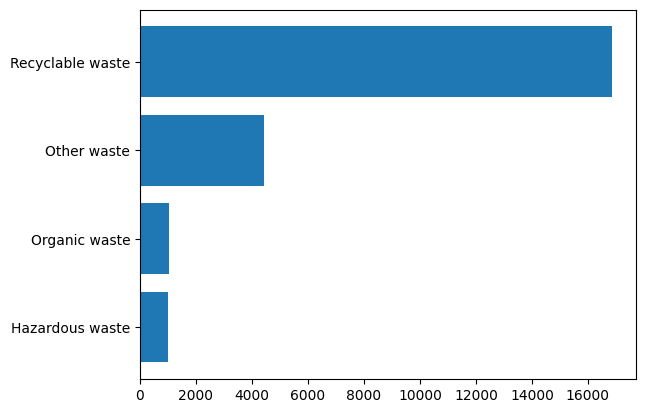

In [3]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()

## thay mau

In [47]:
categ = ['Hazardous waste', 'Organic waste', 'Other waste', 'Recyclable waste']
path = 'DATA_clean'
img_size = 256
df = []

for i in categ:
    path2 = os.path.join(path , i)
    cls_name = categ.index(i)
    for img in os.listdir(path2):
        img_array = cv.imread(os.path.join(path2 , img))
        if img_array is None:
            print(f"Warning: Unable to read image --> Skipping...")
            print(os.path.join(path2 , img))
            continue
        img_array = cv.cvtColor(img_array , cv.COLOR_BGR2GRAY)
        new_array = cv.resize(img_array , (256,256))
        df.append([new_array , cls_name])


random.shuffle(df)

In [52]:
print(df[3])


[array([[190, 191, 191, ..., 179, 185, 189],
       [191, 192, 190, ..., 176, 180, 183],
       [189, 189, 187, ..., 172, 174, 176],
       ...,
       [160, 161, 161, ..., 166, 173, 174],
       [155, 154, 153, ..., 164, 172, 175],
       [148, 141, 137, ..., 164, 173, 176]], dtype=uint8), 3]


## Split into train and test sets

After the data statistics process, I will divide the data into 2 sets of Train and Test according to the familiar ratio of 80% for the train and 20% for the test. To divide the data into 2 sets, I define the following function:

In [54]:
x_train = []
y_train = []
for features, label in df:
    x_train.append(features)
    y_train.append(label)

x = np.array(x_train)
y = np.array(y_train)

x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [55]:
from skimage.feature import local_binary_pattern

In [56]:

def extract_lbp_features(images, radius=3, points=24):
    features = []
    for img in images:
        lbp = local_binary_pattern(img, points, radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, points + 3),
                                 range=(0, points + 2))
        hist = hist.astype("float")
        hist /= hist.sum()
        features.append(hist)
    return np.array(features)

# Extract LBP features for training and testing
x_train_lbp = extract_lbp_features(x_train)
x_test_lbp = extract_lbp_features(X_test)

print("LBP features shape (train):", x_train_lbp.shape)

LBP features shape (train): (18672, 26)


In [76]:
from skimage.feature import hog

def extract_hog_features(images):
    features = []
    for img in images:
        hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        features.append(hog_features)
    return np.array(features)

# Extract HoG features for training and testing
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(X_test)

print("HoG features shape (train):", x_train_hog.shape)

HoG features shape (train): (18672, 34596)


In [73]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Train SVM with LBP features
svm_lbp = SVC(kernel='linear')
svm_lbp.fit(x_train_lbp, y_train)


# Train RF with LBP features
rf_lbp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lbp.fit(x_train_lbp, y_train)



RandomForestClassifier(random_state=42)

In [1]:
from sklearn.metrics import accuracy_score

# Evaluate SVM with LBP
y_pred_svm_lbp = svm_lbp.predict(x_test_lbp)
accuracy_svm_lbp = accuracy_score(Y_test, y_pred_svm_lbp)

y_pred_rf_lbp = rf_lbp.predict(x_test_lbp)
accuracy_rf_lbp = accuracy_score(Y_test, y_pred_rf_lbp)

print("Accuracy - SVM with LBP:", accuracy_svm_lbp)
print("Accuracy - RF with LBP:", accuracy_rf_lbp)

NameError: name 'svm_lbp' is not defined